In this data is about the flight price as to why does it changes all the time in every month and every new season, 
so in this we are goin to predict the price of the flight
and the data type here is continuous type we are going  to use the linear regression algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
fi=pd.read_csv('Flight.csv', parse_dates=['Date_of_Journey'])
fi.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [3]:
fi.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [4]:
fi.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fi['Route']=le.fit_transform(fi['Route'].astype(str))

In [6]:
fi

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,18,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,84,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,118,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,91,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,29,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,64,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,64,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,18,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,18,11:30,14:10,2h 40m,non-stop,No info,12648


In [7]:
fi['Total_Stops']=le.fit_transform(fi['Total_Stops'].astype(str))
fi['Destination']=le.fit_transform(fi['Destination'].astype(str))
fi['Source']=le.fit_transform(fi['Source'].astype(str))
fi['Airline']=le.fit_transform(fi['Airline'])
fi['Total_Stops']=le.fit_transform(fi['Total_Stops'].astype(str))
fi['Duration']=le.fit_transform(fi['Duration'])

In [8]:
fi['Dep_Time']=le.fit_transform(fi['Dep_Time'])


In [9]:
ac=fi['Additional_Info']== 'No info'

In [10]:
ac.sum()

8345

Hence we can drop the Additional Info column as most of column has no information
about the extra meal or something, its better to drop it.
Secondly we will also drop Arrival Time column as the data already has departure time and duration of the flight.


In [11]:
fi.dtypes

Airline                     int32
Date_of_Journey    datetime64[ns]
Source                      int32
Destination                 int32
Route                       int32
Dep_Time                    int32
Arrival_Time               object
Duration                    int32
Total_Stops                 int32
Additional_Info            object
Price                       int64
dtype: object

In [12]:
ft=fi.drop(['Date_of_Journey','Arrival_Time','Additional_Info'], axis=1)

In [13]:
ft

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Price
0,3,0,5,18,211,240,5,3897
1,1,3,0,84,31,336,1,7662
2,4,2,1,118,70,106,1,13882
3,3,3,0,91,164,311,0,6218
4,3,0,5,29,149,303,0,13302
...,...,...,...,...,...,...,...,...
10678,0,3,0,64,183,236,5,4107
10679,1,3,0,64,193,237,5,4145
10680,4,0,2,18,58,280,5,7229
10681,10,0,5,18,92,238,5,12648


In [14]:
ft.isnull().sum()

Airline        0
Source         0
Destination    0
Route          0
Dep_Time       0
Duration       0
Total_Stops    0
Price          0
dtype: int64

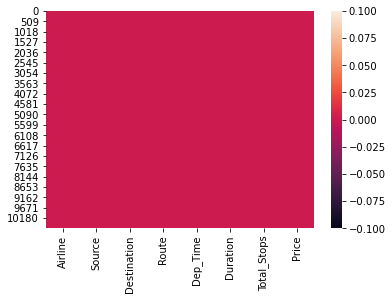

In [15]:
sns.heatmap(ft.isnull())

In [16]:
ft.describe()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,74.825143,107.980717,194.069269,1.785266,9087.064121
std,2.352155,1.177221,1.474782,36.730924,61.085563,108.620556,2.268105,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,2.000000,0.000000,48.000000,55.000000,106.000000,0.000000,5277.000000
50%,4.000000,2.000000,1.000000,73.000000,96.000000,233.000000,0.000000,8372.000000
75%,4.000000,3.000000,2.000000,104.000000,164.000000,280.000000,5.000000,12373.000000
max,11.000000,4.000000,5.000000,128.000000,221.000000,367.000000,5.000000,79512.000000


In [17]:
ft.corr()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Price
Airline,1.000000,-0.013401,0.018479,0.025039,-0.039439,0.027917,0.046130,-0.039520
Source,-0.013401,1.000000,-0.592574,0.403378,0.055191,-0.192009,-0.227074,0.015998
Destination,0.018479,-0.592574,1.000000,-0.461169,-0.063608,0.022037,0.340446,-0.071112
Route,0.025039,0.403378,-0.461169,1.000000,-0.082080,-0.062111,-0.445250,0.164085
Dep_Time,-0.039439,0.055191,-0.063608,-0.082080,1.000000,0.041619,0.046574,0.002949
Duration,0.027917,-0.192009,0.022037,-0.062111,0.041619,1.000000,0.177752,-0.144270
Total_Stops,0.046130,-0.227074,0.340446,-0.445250,0.046574,0.177752,1.000000,-0.581863
Price,-0.039520,0.015998,-0.071112,0.164085,0.002949,-0.144270,-0.581863,1.000000


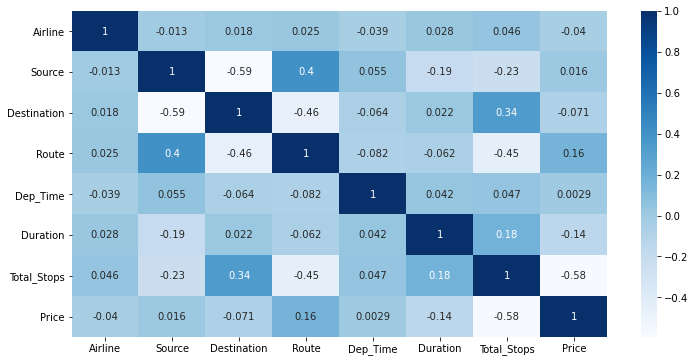

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(ft.corr(), annot=True, cmap="Blues")

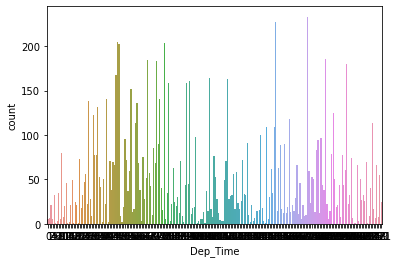

In [19]:
sns.countplot(x='Dep_Time', data=ft)

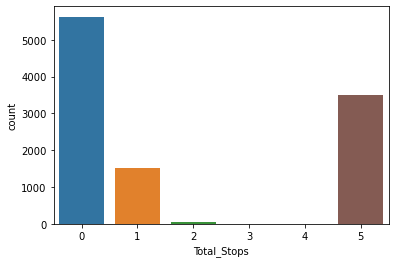

In [20]:
sns.countplot(x='Total_Stops', data=ft)

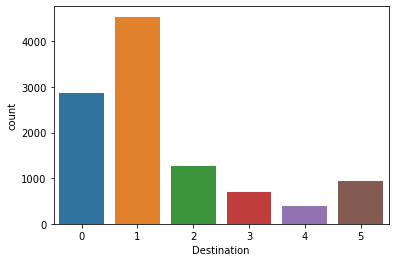

In [21]:
sns.countplot(x='Destination', data=ft)

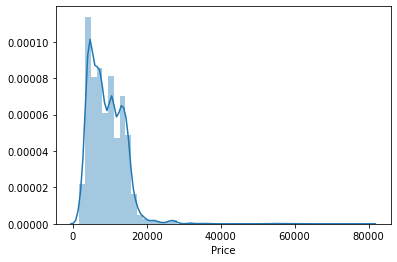

In [22]:
sns.distplot(ft['Price'])

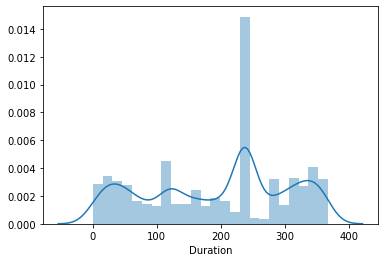

In [23]:
sns.distplot(ft['Duration'])

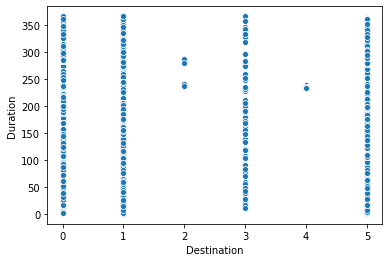

In [24]:
sns.scatterplot(x='Destination', y='Duration', data=ft)

{'whiskers': [<matplotlib.lines.Line2D at 0xc9f5ac0>,
 'caps': [<matplotlib.lines.Line2D at 0xca031c0>,
 'boxes': [<matplotlib.lines.Line2D at 0xc9f5760>],
 'medians': [<matplotlib.lines.Line2D at 0xca03880>],
 'fliers': [<matplotlib.lines.Line2D at 0xca03b80>],
 'means': []}

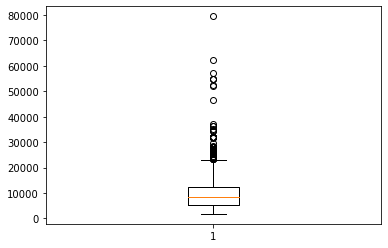

In [25]:
plt.boxplot(ft['Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0xca56f10>,
 'caps': [<matplotlib.lines.Line2D at 0xca63610>,
 'boxes': [<matplotlib.lines.Line2D at 0xca56bb0>],
 'medians': [<matplotlib.lines.Line2D at 0xca63cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0xca63fd0>],
 'means': []}

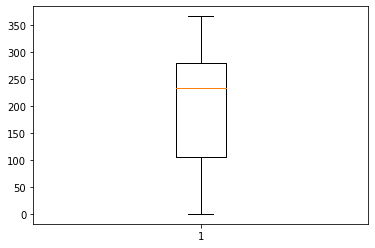

In [26]:
plt.boxplot(ft['Duration'])

{'whiskers': [<matplotlib.lines.Line2D at 0xda81e80>,
 'caps': [<matplotlib.lines.Line2D at 0xda8e580>,
 'boxes': [<matplotlib.lines.Line2D at 0xda81b20>],
 'medians': [<matplotlib.lines.Line2D at 0xda8ec40>],
 'fliers': [<matplotlib.lines.Line2D at 0xda8ef40>],
 'means': []}

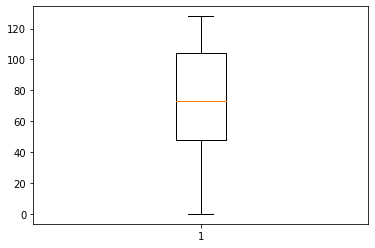

In [27]:
plt.boxplot(ft['Route'])

{'whiskers': [<matplotlib.lines.Line2D at 0xdae0880>,
 'caps': [<matplotlib.lines.Line2D at 0xdae0f40>,
 'boxes': [<matplotlib.lines.Line2D at 0xdae0520>],
 'medians': [<matplotlib.lines.Line2D at 0xdaeb640>],
 'fliers': [<matplotlib.lines.Line2D at 0xdaeb940>],
 'means': []}

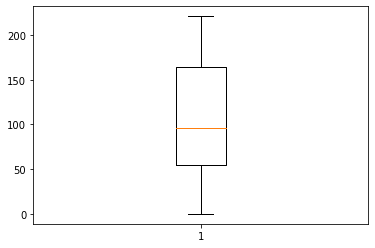

In [28]:
plt.boxplot(ft['Dep_Time'])

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(ft))
fg=ft[(z<3).all(axis=1)]
fg

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Price
0,3,0,5,18,211,240,5,3897
1,1,3,0,84,31,336,1,7662
2,4,2,1,118,70,106,1,13882
3,3,3,0,91,164,311,0,6218
4,3,0,5,29,149,303,0,13302
...,...,...,...,...,...,...,...,...
10678,0,3,0,64,183,236,5,4107
10679,1,3,0,64,193,237,5,4145
10680,4,0,2,18,58,280,5,7229
10681,10,0,5,18,92,238,5,12648


{'whiskers': [<matplotlib.lines.Line2D at 0xdb379d0>,
 'caps': [<matplotlib.lines.Line2D at 0xdb410d0>,
 'boxes': [<matplotlib.lines.Line2D at 0xdb37670>],
 'medians': [<matplotlib.lines.Line2D at 0xdb41790>],
 'fliers': [<matplotlib.lines.Line2D at 0xdb41a90>],
 'means': []}

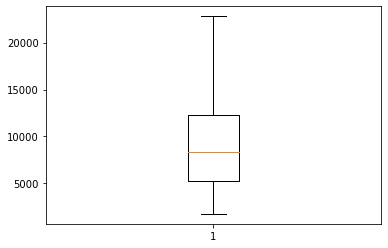

In [30]:
plt.boxplot(fg['Price'])

As we can see in the above the boxplot that all the outliers were removed as compare to the same above price columns.
Now, we will check for the skewness in the data, remove it if present more than the desired value which 0.5 .

In [31]:
fg.skew()

Airline        0.731723
Source        -0.437770
Destination    1.267105
Route         -0.509937
Dep_Time       0.194056
Duration      -0.215311
Total_Stops    0.655691
Price          0.412076
dtype: float64

(array([2870.,    0., 4521.,    0., 1265.,    0.,  691.,    0.,  381.,
         859.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

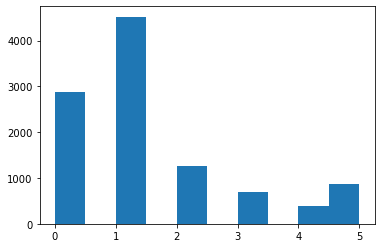

In [32]:
plt.hist(fg['Destination'], bins=10)

In [33]:
fh=fg.copy()

In [34]:
fh['Destination']=np.log1p(fh['Destination'])

(array([2870.,    0.,    0., 4521.,    0.,    0., 1265.,  691.,  381.,
         859.]),
 array([0.        , 0.17917595, 0.35835189, 0.53752784, 0.71670379,
        0.89587973, 1.07505568, 1.25423163, 1.43340758, 1.61258352,
        1.79175947]),
 <a list of 10 Patch objects>)

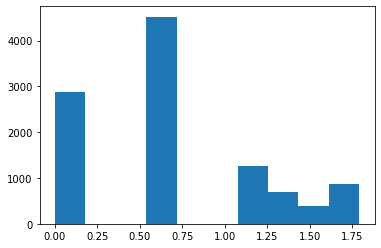

In [35]:
plt.hist(fh['Destination'], bins=10)

In [36]:
fh.skew()

Airline        0.731723
Source        -0.437770
Destination    0.284929
Route         -0.509937
Dep_Time       0.194056
Duration      -0.215311
Total_Stops    0.655691
Price          0.412076
dtype: float64

Now we are going for the Linear Regression as the target value are continuous and we check for the r2 score.
We have selected few specific columns to predict the flight price, as source and destination is most important
to know the distance, also number of stops and duration to travel and type of airline in which we travel
all these are some of the measure parameters to predict the flight price.

In [37]:
x=fh.iloc[:,0:-1]
y=fh.iloc[:,-1]

In [38]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
max_scr=0
for rstate in range(1,70):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rstate, test_size=0.30)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_scr:
        max_scr=r2_scr
        final_rstate=rstate 
        
print('The corresponding value for maximum rstate',final_rstate, 'to the r2 Score is', max_scr)

The corresponding value for maximum rstate 60 to the r2 Score is 0.4450155203140702


In [40]:
x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=64, test_size=0.30)
ln=LinearRegression()
ln.fit(x_train,y_train)
pred_yl=ln.predict(x_test)
r2_scr=r2_score(y_test,pred_yl)
r2_scr

0.42334948211520296

In [41]:
from sklearn.model_selection import cross_val_score
crs_val_scr=cross_val_score(ln,x,y,scoring='r2',cv=5).mean()
crs_val_scr

0.4131241307979415

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.1,0.01,0.001,0.0001], 'n_estimators':[100,200,500,1000]}
grrb=GridSearchCV(gbr,parameters,cv=5)
grrb.fit(x,y)
grrb.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [43]:
gbr=GradientBoostingRegressor(learning_rate=0.1, n_estimators=1000)
print('The cross Val Score',cross_val_score(gbr,x,y,cv=5, scoring='r2').mean())

The cross Val Score 0.7135347978065721


In [46]:
gbr=GradientBoostingRegressor(learning_rate=0.1, n_estimators=200)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_y=gbr.predict(x_test)
r2_scr=r2_score(y_test,pred_y)
print('r2 score',r2_scr)

r2 score 0.6896994716295299


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
alpha_value={'alpha':[1,0.1,0.01,0.001]}
model=Ridge(),Lasso()
for m in model:
    grid=GridSearchCV(estimator=m, param_grid=alpha_value, cv=5)
    grid.fit(x,y)
    print(grid.best_params_)
    print(grid.best_score_)

{'alpha': 1}
0.4131243665042502
{'alpha': 1}
0.4131391178131939


In [56]:
ls=Lasso(alpha=1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_y=ls.predict(x_test)
r2_scr=r2_score(y_test,pred_y)
print('r2 score',r2_scr)

r2 score 0.42333923333749657


In [57]:
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_y=rd.predict(x_test)
r2_scr=r2_score(y_test,pred_y)
print('r2 score',r2_scr)

r2 score 0.42333446384872575


In [ ]:
we get a better result in the gradient boosting regressor and we are going to save that model for the better use and prediction.

In [58]:
df1=pd.DataFrame(pred_y)
df1.to_csv('gbr_prediction.csv')

In [59]:
import joblib
joblib.dump(gbr,'gbr_Flight.pkl')

['gbr_Flight.pkl']